In [1]:
#https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
districts_df = pd.read_csv('/Users/gauravtyagi/Downloads/Data/Covid19-DigitalLearning/districts_info.csv')
districts_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
products_df = pd.read_csv('/Users/gauravtyagi/Downloads/Data/Covid19-DigitalLearning/products_info.csv')
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [4]:
all_files = os.listdir('/Users/gauravtyagi/Downloads/Data/Covid19-DigitalLearning/engagement_data')

frames = []
keys = []

for filename in all_files:
    df = pd.read_csv('/Users/gauravtyagi/Downloads/Data/Covid19-DigitalLearning/engagement_data/' + filename, index_col=None, header=0)
    district_id = filename[:4]
    df["district_id"] = district_id
    frames.append(df)
    keys.append(district_id)
    
engagement_df = pd.concat(frames, keys=keys)
engagement_df.head()

time    lp_id  pct_access  engagement_index district_id
3188 0  2020-01-01  29322.0        0.04              1.30        3188
     1  2020-01-01  57084.0        0.04              0.43        3188
     2  2020-01-01  99916.0        0.09              5.20        3188
     3  2020-01-01  58235.0        0.00               NaN        3188
     4  2020-01-01  11585.0        0.04              1.30        3188

In [5]:
districts_df.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

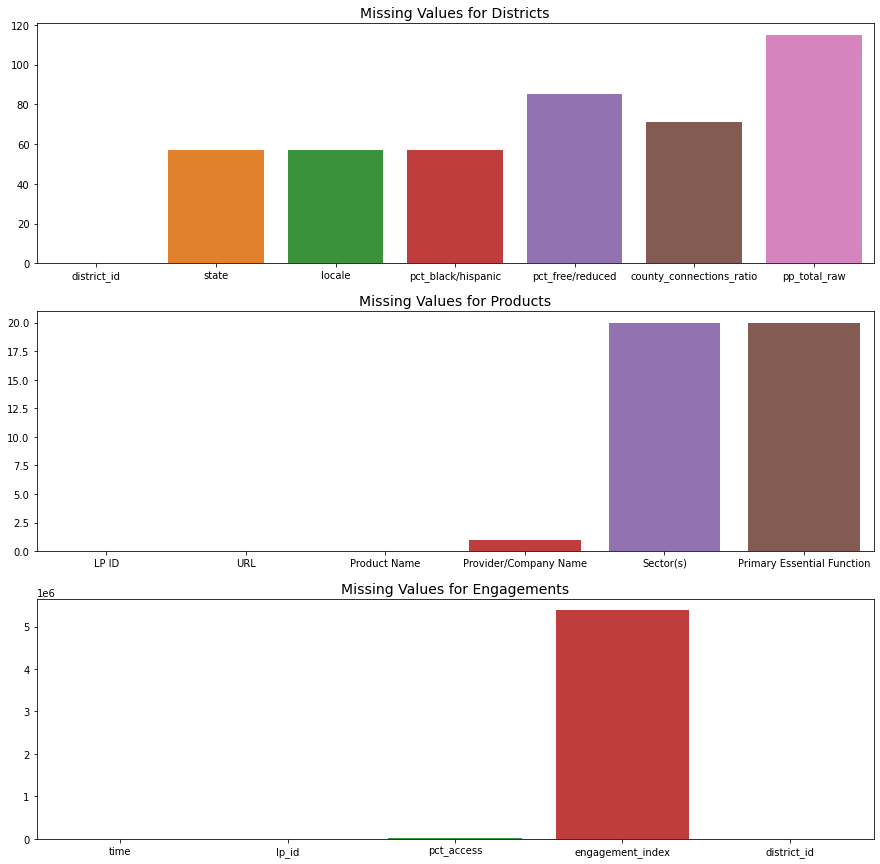

In [6]:
fig, axs = plt.subplots(3, figsize=(15,15))

sns.barplot(ax=axs[0], x=districts_df.columns, y=districts_df.isnull().sum())
axs[0].set_title('Missing Values for Districts',fontsize=14)

sns.barplot(ax=axs[1], x=products_df.columns, y=products_df.isnull().sum())
axs[1].set_title('Missing Values for Products',fontsize=14)

sns.barplot(ax=axs[2], x=engagement_df.columns, y=engagement_df.isnull().sum())
axs[2].set_title('Missing Values for Engagements',fontsize=14)

plt.show()

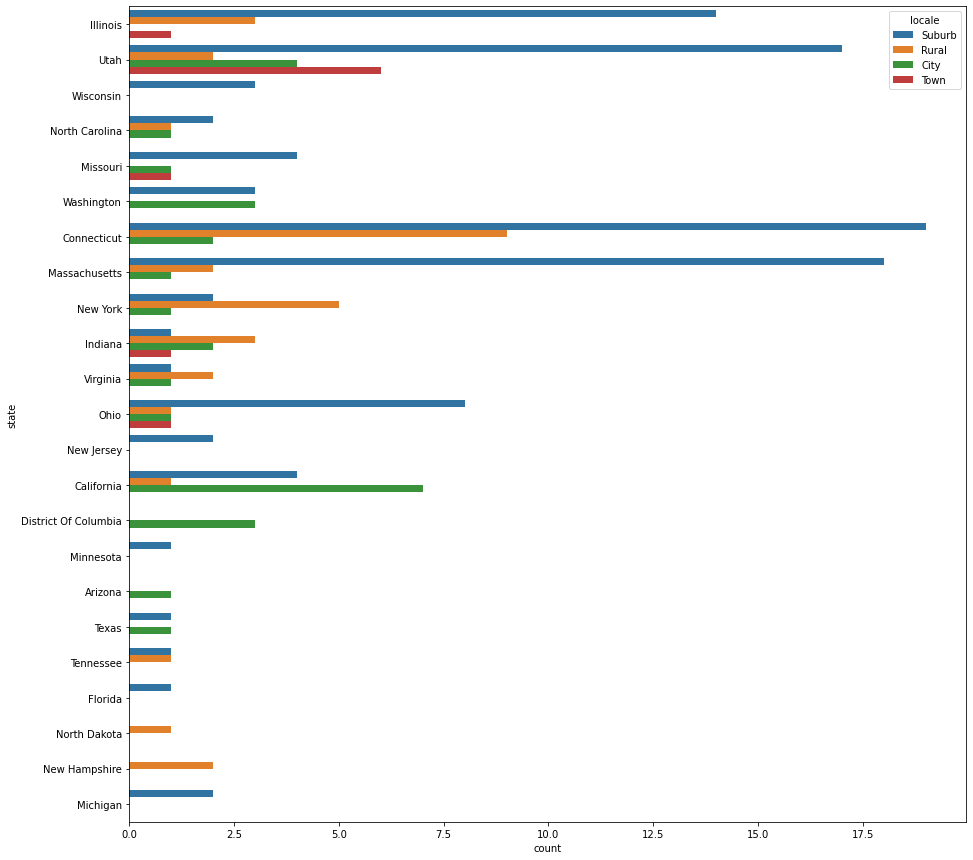

In [7]:
fig = plt.figure(figsize=(15,15))
ax = sns.countplot(y=districts_df.state,hue=districts_df.locale)

In [8]:
import geoviews as gv
import geopandas as gpd
import cartopy.crs as crs

gv.Polygons(districts_df , vdims=['state', ('county_connections_ratio', 'pp_total_raw')]).opts(
    tools=['hover'], width=600, projection=crs.Robinson())

:Polygons   [district_id,locale]   (state,county_connections_ratio)

In [10]:
dataset = gv.Dataset(districts_df)
points = dataset.to(gv.Points, ['state','district_id'],['pp_total_raw'])
osm_map=gv.tile_sources.OSM
osm_map.opts() * points.opts()

:HoloMap   [locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [state,district_id]   (pp_total_raw)